In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
def pad_images(image, filter_size):
    p = int((filter_size - 1)/2)
    image = np.pad(array=image, pad_width=p, mode='constant', constant_values=0)
    return image

def create_dataset(gray, red, green, blue, f_s):
    X = []
    y = []
    p_gray = pad_images(gray, f_s)
    p_red = pad_images(red, f_s)
    p_green = pad_images(green, f_s)
    p_blue = pad_images(blue, f_s)
    
    for i in range(0, len(p_gray)-(f_s-1)):
        for j in range(0, len(p_gray)-(f_s-1)):
            X.append(list(p_gray[i:i+f_s,j:j+f_s].flatten()))
            y.append([p_red[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)], 
                      p_green[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)], 
                      p_blue[i:i+f_s,j:j+f_s].flatten()[int(f_s*f_s/2)]])
    
    return X, y
    
def get_images(directory, f_s):
    exts = ["jpg", "jpeg", "png"]
    print("Opening directory {}".format(directory))
    for root, dirs, files in os.walk(directory):
        if root:
            X = []
            y = []
            file_name = []
            for f in files:
                if f.split(".")[1] in exts:
                    print("Accessging ", f)
                    image = cv2.imread(os.path.join(root, f))
                    image = cv2.resize(image, (500,500), interpolation = cv2.INTER_AREA)
                    # gray image
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # red, green, blue components
                    red, green, blue = image[:,:,2], image[:,:,1], image[:,:,0]
                    m_X, m_y = create_dataset(gray, red, green, blue, f_s)
                
                    X.append(m_X)
                    y.append(m_y)
                    file_name.append(f)
    return X, y, file_name
                
def align_data(X, y):
    data_X = []
    for sublist in X:
        for item in sublist:
            data_X.append(item)

    data_y_red = []
    data_y_green = []
    data_y_blue = []

    for sublist in y:
        for item in sublist:
            data_y_red.append(item[0])
            data_y_green.append(item[1])
            data_y_blue.append(item[2])
            
    return data_X, data_y_red, data_y_green, data_y_blue

In [3]:
directory = "./Images2/"
filter_size = 11
X, y, files = get_images(directory, filter_size)
data_X, data_y_red, data_y_green, data_y_blue = align_data(X, y)

Opening directory ./Images2/
Accessging  scene8.jpeg
Accessging  scene8.jpeg


In [4]:
# Model for red
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(data_X, data_y_red, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_r)

X_train_r = scaler.transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

mlp_r = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=2000, alpha=0.003, verbose=True)
mlp_r.fit(X_train_r,y_train_r)

Iteration 1, loss = 1756.36429557
Iteration 2, loss = 571.65426803
Iteration 3, loss = 518.03808220
Iteration 4, loss = 488.73547650
Iteration 5, loss = 474.63373634
Iteration 6, loss = 465.61512463
Iteration 7, loss = 457.68886567
Iteration 8, loss = 451.63543113
Iteration 9, loss = 446.17203058
Iteration 10, loss = 440.35760436
Iteration 11, loss = 437.56333606
Iteration 12, loss = 433.34259868
Iteration 13, loss = 430.50186290
Iteration 14, loss = 426.92818018
Iteration 15, loss = 424.53534221
Iteration 16, loss = 422.23811107
Iteration 17, loss = 418.79302629
Iteration 18, loss = 416.87613729
Iteration 19, loss = 415.71545135
Iteration 20, loss = 413.91647252
Iteration 21, loss = 412.22536081
Iteration 22, loss = 410.37821427
Iteration 23, loss = 409.36834357
Iteration 24, loss = 407.24631880
Iteration 25, loss = 406.55259091
Iteration 26, loss = 405.44330427
Iteration 27, loss = 404.39746632
Iteration 28, loss = 403.41350740
Iteration 29, loss = 402.60342473
Iteration 30, loss = 4

Iteration 239, loss = 361.48391897
Iteration 240, loss = 362.09787782
Iteration 241, loss = 361.89424167
Iteration 242, loss = 362.32104505
Iteration 243, loss = 361.20470708
Iteration 244, loss = 361.39010426
Iteration 245, loss = 361.75945882
Iteration 246, loss = 361.22654968
Iteration 247, loss = 361.07430239
Iteration 248, loss = 361.99846391
Iteration 249, loss = 361.21342418
Iteration 250, loss = 361.01775583
Iteration 251, loss = 361.25863813
Iteration 252, loss = 361.74348192
Iteration 253, loss = 361.94540875
Iteration 254, loss = 361.61948892
Iteration 255, loss = 360.79420546
Iteration 256, loss = 361.62232767
Iteration 257, loss = 360.47845710
Iteration 258, loss = 361.46396745
Iteration 259, loss = 360.46414220
Iteration 260, loss = 360.76932922
Iteration 261, loss = 361.04593764
Iteration 262, loss = 359.96210641
Iteration 263, loss = 361.01125700
Iteration 264, loss = 361.32569911
Iteration 265, loss = 360.62759849
Iteration 266, loss = 360.65137149
Iteration 267, loss 

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [5]:
predictions_r = mlp_r.predict(X_test_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


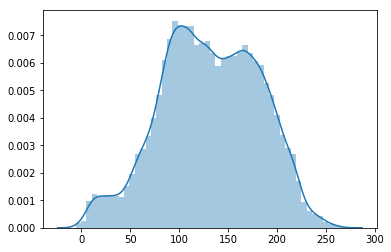

In [6]:
sns.distplot(predictions_r)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


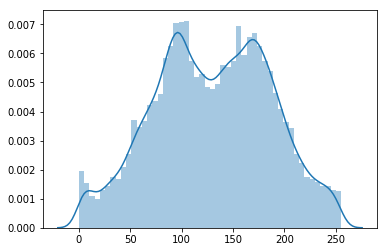

In [7]:
sns.distplot(y_test_r)

In [8]:
# Model for green
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(data_X, data_y_green, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_g)

X_train_g = scaler.transform(X_train_g)
X_test_g = scaler.transform(X_test_g)

mlp_g = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=2000, alpha=0.003, verbose=True)
mlp_g.fit(X_train_g,y_train_g)

Iteration 1, loss = 1915.11964916
Iteration 2, loss = 128.54986091
Iteration 3, loss = 116.02423714
Iteration 4, loss = 109.67640539
Iteration 5, loss = 106.68779550
Iteration 6, loss = 105.35098793
Iteration 7, loss = 104.03368548
Iteration 8, loss = 103.48917259
Iteration 9, loss = 102.95680562
Iteration 10, loss = 102.76302516
Iteration 11, loss = 101.69933667
Iteration 12, loss = 101.08472128
Iteration 13, loss = 101.15460310
Iteration 14, loss = 100.43551739
Iteration 15, loss = 100.14346708
Iteration 16, loss = 99.62826958
Iteration 17, loss = 99.22575133
Iteration 18, loss = 99.10537771
Iteration 19, loss = 98.57230157
Iteration 20, loss = 98.38661342
Iteration 21, loss = 98.78873044
Iteration 22, loss = 98.18793793
Iteration 23, loss = 97.85705355
Iteration 24, loss = 97.94278860
Iteration 25, loss = 97.57271539
Iteration 26, loss = 97.53050500
Iteration 27, loss = 97.59531278
Iteration 28, loss = 97.44690638
Iteration 29, loss = 97.37613226
Iteration 30, loss = 97.26453616
Ite

MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [9]:
predictions_g = mlp_g.predict(X_test_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


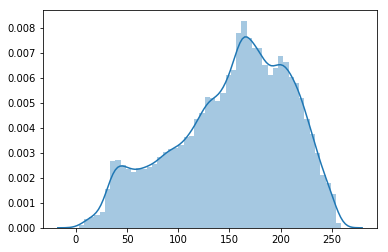

In [10]:
sns.distplot(predictions_g)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


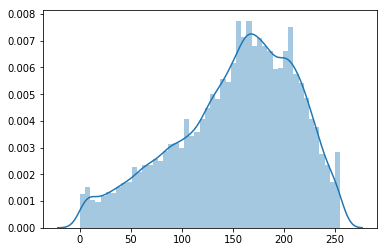

In [11]:
sns.distplot(y_test_g)

In [12]:
# Model for blue
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(data_X, data_y_blue, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_b)

X_train_b = scaler.transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

mlp_b = MLPRegressor(hidden_layer_sizes=(10,20,20,20,10),  activation='relu', 
                   solver='adam', max_iter=2000, alpha=0.003, verbose=True)
mlp_b.fit(X_train_b,y_train_b)

Iteration 1, loss = 3045.72584934
Iteration 2, loss = 791.23763323
Iteration 3, loss = 688.67800009
Iteration 4, loss = 639.13944565
Iteration 5, loss = 603.99221510
Iteration 6, loss = 574.83193612
Iteration 7, loss = 547.96541054
Iteration 8, loss = 530.78876768
Iteration 9, loss = 516.70161833
Iteration 10, loss = 506.18950140
Iteration 11, loss = 497.35598493
Iteration 12, loss = 488.98393302
Iteration 13, loss = 479.89722462
Iteration 14, loss = 475.21260850
Iteration 15, loss = 469.39560948
Iteration 16, loss = 465.30438002
Iteration 17, loss = 460.98974661
Iteration 18, loss = 456.83180472
Iteration 19, loss = 452.27776051
Iteration 20, loss = 449.54093854
Iteration 21, loss = 444.85549194
Iteration 22, loss = 443.93732375
Iteration 23, loss = 439.97077137
Iteration 24, loss = 436.34497761
Iteration 25, loss = 436.33038351
Iteration 26, loss = 434.01293518
Iteration 27, loss = 432.61456116
Iteration 28, loss = 427.79646522
Iteration 29, loss = 427.48516404
Iteration 30, loss = 4

Iteration 239, loss = 349.48723775
Iteration 240, loss = 348.36138855
Iteration 241, loss = 349.21765123
Iteration 242, loss = 349.75781234
Iteration 243, loss = 348.64089360
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.003, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 20, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [13]:
predictions_b = mlp_b.predict(X_test_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


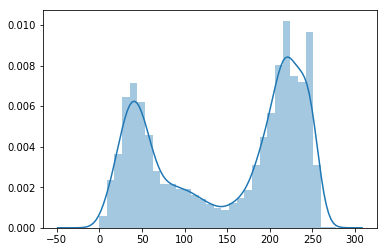

In [14]:
sns.distplot(predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


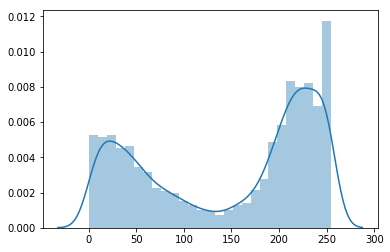

In [15]:
sns.distplot(y_test_b)

In [24]:
def bound_predictions(predictions_b, predictions_g, predictions_r):
    for i in range(len(predictions_g)):
        if predictions_b[i] < 0:
            predictions_b[i] = 0
        if predictions_b[i] > 255:
            predictions_b[i] = 255
        if predictions_g[i] < 0:
            predictions_g[i] = 0
        if predictions_g[i] > 255:
            predictions_g[i] = 255
        if predictions_r[i] < 0:
            predictions_r[i] = 0
        if predictions_r[i] > 255:
            predictions_r[i] = 255
    
        predictions_b[i] = int(predictions_b[i])
        predictions_g[i] = int(predictions_g[i])
        predictions_r[i] = int(predictions_r[i])
        
    return predictions_r, predictions_g, predictions_b

In [35]:
directory = "./Images2/test"
filter_size = 11
X, y, files = get_images(directory, filter_size)
print(files)
data_X_test, data_y_red_test, data_y_green_test, data_y_blue_test = align_data(X, y)
data_X_test = scaler.transform(data_X_test)

Opening directory ./Images2/test
Accessging  scene10.jpeg
['scene10.jpeg']


In [36]:
test_predictions_b = mlp_b.predict(data_X_test)
test_predictions_g = mlp_g.predict(data_X_test)
test_predictions_r = mlp_r.predict(data_X_test)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


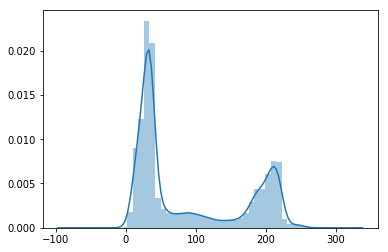

In [37]:
sns.distplot(test_predictions_b)

/home/vedantc6/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


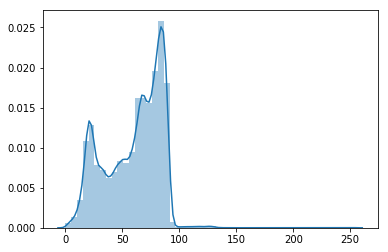

In [38]:
sns.distplot(data_y_blue_test)

In [39]:
test_predictions_b, test_predictions_g, test_predictions_r = bound_predictions(test_predictions_b, test_predictions_g, test_predictions_r)

In [40]:
test_predictions_b

array([46., 49., 49., ..., 36., 40., 40.])

In [41]:
from PIL import Image

In [42]:
class Colorizer():
    def __init__(self, red_list, blue_list, green_list, image_location='./Images2/test/scene10.jpeg'):
        self.im_size = (0, 0)
        self.image_loc = image_location
        self.image = None
        self.pix_object = None
        self.pixel_values = None
        self.red = red_list
        self.blue = blue_list
        self.green = green_list
        
    def extract_pixels(self):
        # Open the image
        self.image = Image.open(self.image_loc)
        # Load the image - Pixel object
        self.pix_object = self.image.load()
        # Size of the image - Number of rows * Number of columns
        self.im_size = self.image.size
        # Extract all the pixel values - Start from left corner (Moving from Left to Right)
        self.pixel_values = list(self.image.getdata())
        
    def create_image_from_array(self):
        
        w, h = 500, 500
        count = 0
        data = np.zeros((h, w, 3), dtype=np.uint8)
        
        for i in range(w):
            
            for j in range(h):
                
                data[i,j] = (int(self.red[count]), int(self.green[count]), int(self.blue[count]))
                count +=1
        
        img = Image.fromarray(data, 'RGB')
        img.save('./Images2/my.png')
        img.show()

In [43]:
new_color = Colorizer(red_list=test_predictions_r, blue_list=test_predictions_b, green_list=test_predictions_g)
new_color.extract_pixels()
new_color.create_image_from_array()
print("Done")

Done
